# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.104706e+01     7.232923e+00
 * time: 0.0020110607147216797
     1     3.097020e+01     6.468097e+00
 * time: 0.008672952651977539
     2     2.251917e+01     8.633546e+00
 * time: 0.047859907150268555
     3     2.171733e+01     1.089330e+01
 * time: 0.0537419319152832
     4     1.585360e+01     6.440819e+00
 * time: 0.06178903579711914
     5     1.147102e+01     3.296292e+00
 * time: 0.06919288635253906
     6     1.086962e+01     2.638545e+00
 * time: 0.07472896575927734
     7     9.808837e+00     1.643328e+00
 * time: 0.08045005798339844
     8     9.083558e+00     1.502088e+00
 * time: 0.08655405044555664
     9     8.738570e+00     1.546253e+00
 * time: 0.09248995780944824
    10     8.675574e+00     1.550132e+00
 * time: 0.09715890884399414
    11     8.629594e+00     1.553966e+00
 * time: 0.10199093818664551
    12     8.497821e+00     9.688895e-01
 * time: 0.10810399055480957
    13     8.371435e+00     8.810411e-01
 * ti

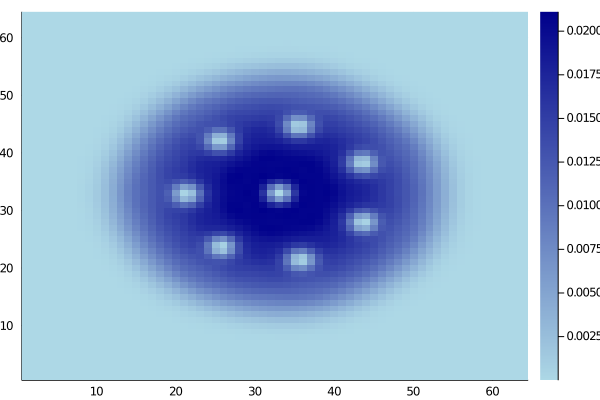

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)